## Buffelgrass observations


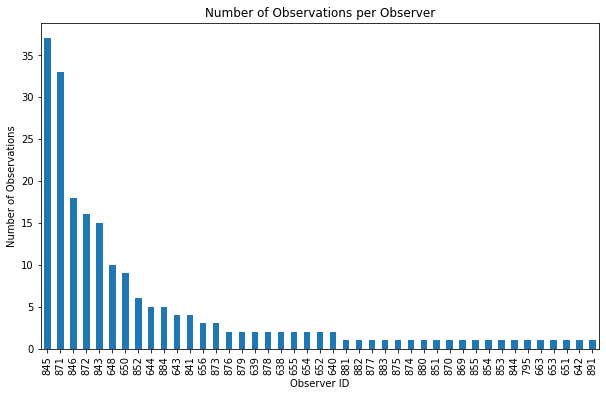

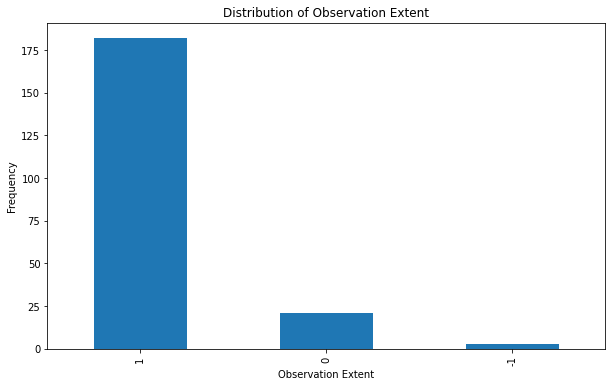

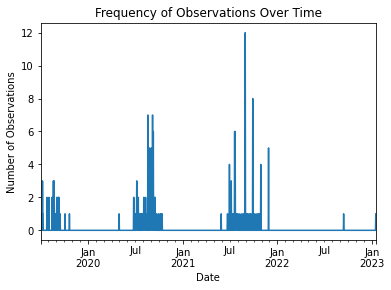

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from datetime import datetime

# load the CSV file into a pandas DataFrame
df = pd.read_csv('data/buffelgrass_one_time.csv')

# drop rows with NaN values in 'Latitude' or 'Longitude' columns
df = df.dropna(subset=['Latitude', 'Longitude'])

# plot on a map the "Latitude Longitude" points for each row
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
for _, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(m)
m.save('map.html')

# plot the number of "Observer_IDs"
observer_counts = df['Observer_ID'].value_counts()
plt.figure(figsize=(10,6))
observer_counts.plot(kind='bar')
plt.title('Number of Observations per Observer')
plt.xlabel('Observer ID')
plt.ylabel('Number of Observations')
plt.show()

# plot "Observation_Extent"
plt.figure(figsize=(10,6))
df['Observation_Extent'].value_counts().plot(kind='bar')
plt.title('Distribution of Observation Extent')
plt.xlabel('Observation Extent')
plt.ylabel('Frequency')
plt.show()

# plot the frequency of observation using "Observation_Date"
df['Observation_Date'] = pd.to_datetime(df['Observation_Date'])
df['Observation_Date'].value_counts().resample('D').sum().plot(kind='line')
plt.title('Frequency of Observations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.show()